# Recognizing HandWritten Digits in Scikit Learn

Scikit learn is one of the most widely used machine learning libraries in the machine learning community the reason behind that is the ease of code and availability of approximately all functionalities which a machine learning developer will need to build a machine learning model. In this article, we will learn how can we use sklearn to train an MLP model on the handwritten digits dataset. Some of the other benefits are:

* It provides classification, regression, and clustering algorithms such as the SVM algorithm, random forests, gradient boosting, and k-means.
* It is also designed to operate with Python’s scientific and numerical libraries NumPy and SciPy. Scikit-learn is a NumFOCUS project that has financial support.

In [1]:
from sklearn import datasets
digit = datasets.load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

* digits.image is a three-dimensional array. The first dimension indexes images, and we can see that there are 1797 in total. 
* The following two dimensions relate to each image’s pixels’ x and y coordinates. 
* Each image is 8×8 = 64 pixels in size. In other terms, this array may be represented in 3D as a stack of 8×8 pixel images. 

In [2]:
print(digit.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


The original digits had much higher resolution, and the resolution was reduced when preparing the dataset for scikit-learn to allow training a machine learning system to recognize these digits easier and faster. Because at such a low resolution, even a human would struggle to recognize some of the digits The low quality of the input photos will also limit our neural network in these settings.

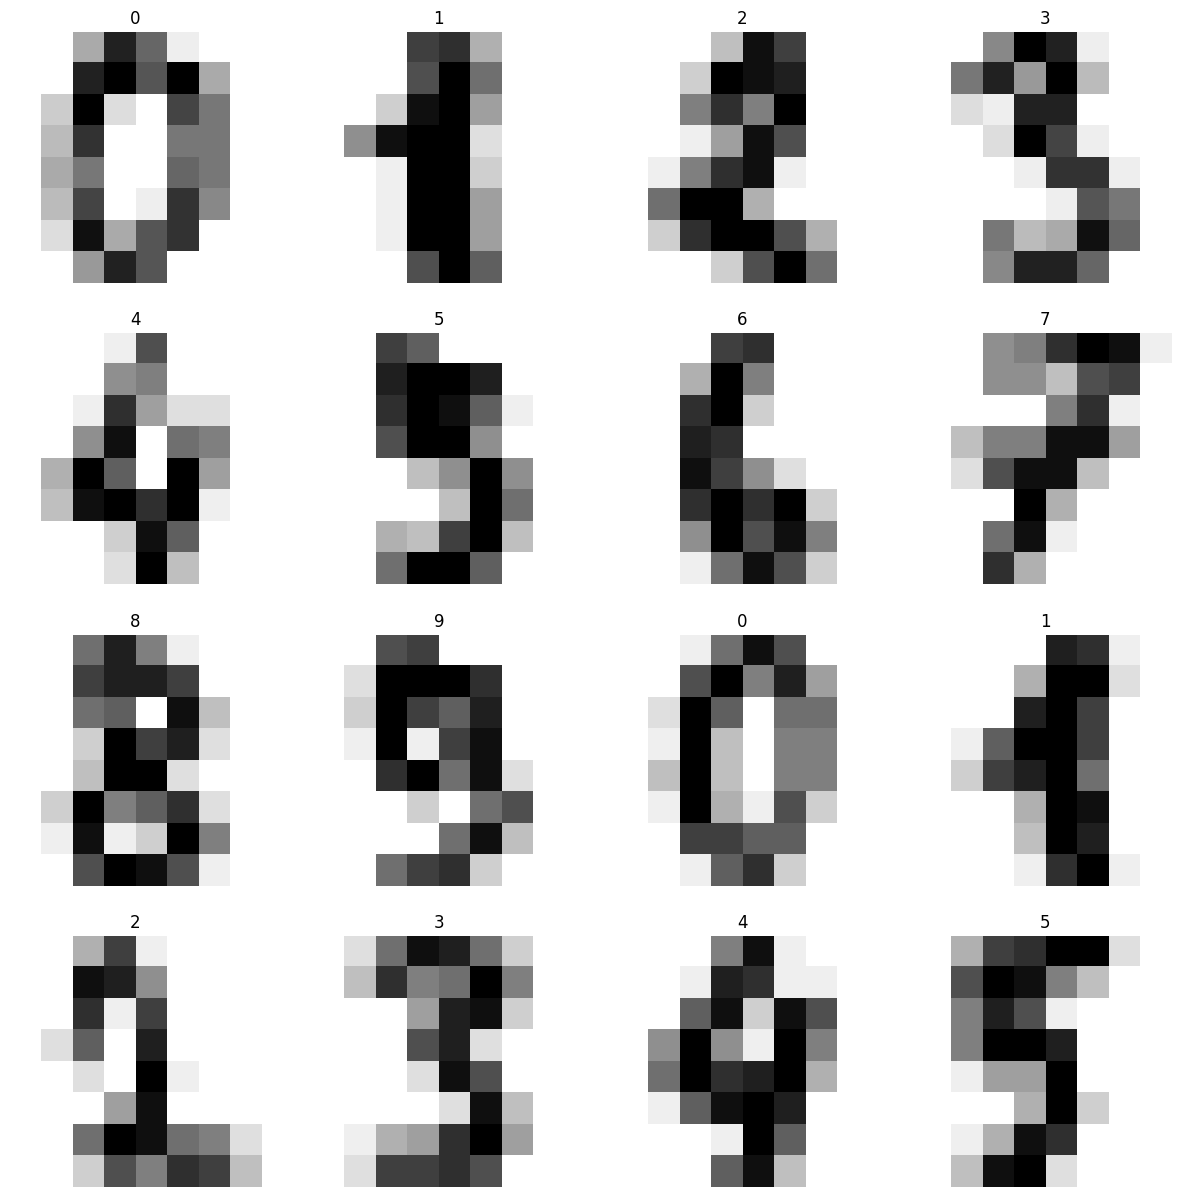

In [3]:
import matplotlib.pyplot as plt

def plot_multi(i):
    n_plots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(n_plots):
        plt.subplot(4,4,j+1)
        plt.imshow(digit.images[i+j], cmap='binary')
        plt.title(digit.target[i+j])
        plt.axis('off')

    plt.show()

plot_multi(0)

### Training Neural Network 
A neural network is a set of algorithms that attempts to recognize underlying relationships in a batch of data using a technique similar to how the human brain works. In this context, neural networks are systems of neurons that might be organic or artificial in nature.

* an input layer consisting of 64 nodes, one for each pixel in the input pictures They simply send their input value to the neurons of the following layer.
* This is a dense neural network, meaning each node in each layer is linked to all nodes in the preceding and following levels.

The input layer expects a one-dimensional array, whereas the image datasets are two-dimensional. As a result, flattening all images process takes place

In [4]:
y = digit.target
x = digit.images.reshape((len(digit.images), -1))
x.shape

(1797, 64)

In [5]:
# printing the one-
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Data Split for Training and Testing
When machine learning algorithms are used to make predictions based on data that was not used to train the model, the train-test split process is used to measure their performance.

It is a quick and simple technique that allows you to compare the performance of algorithms for machine learning for your predictive modeling challenge.


In [6]:
#Very first 1000 photographs and labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]

#The leftover dataset will be utilised to test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

### Usage of Multi Layer Perceptron Classifier
MLP stands for multi-layer perceptron. It consists of densely connected layers that translate any input dimension to the required dimension. A multi-layer perception is a neural network with multiple layers. To build a neural network, we connect neurons so that their outputs become the inputs of other neurons.

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    alpha = 1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

In [9]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

Above shown is the loss for the last five epochs of the MLPClassifier and its respective configuration.

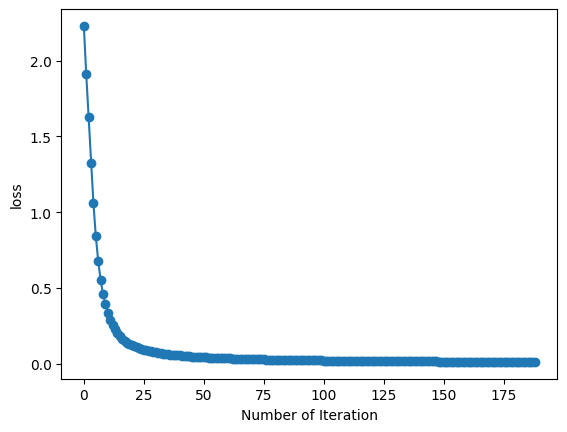

In [10]:
fig, axes = plt.subplots(1,1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("Number of Iteration")
axes.set_ylabel("loss")
plt.show()

### Model Evaluation
Now let’s check the performance of the model using the recognition dataset or it just has memorized it. We will do this by using the leftover testing data so, that we can check whether the model has learned the actual pattern in the digit 

In [11]:
predict = mlp.predict(x_test)
predict[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [12]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [13]:
# find accuracy model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.9146800501882058